In [7]:
### Load libraries:
library(here) # setting paths
library(raster) # for spatial data
library(rgdal) # for spatial data

In [8]:
library(tmap)

In [9]:
# Path to counties in China:
path2counties<-here("raw_data","CHN_adm")

In [21]:
cont_fname<-here("raw_data","ne_50m_land")
continents <- readOGR(dsn = cont_fname, layer = sub('.*/', '', cont_fname))

OGR data source with driver: ESRI Shapefile 
Source: "G:\My Drive\my_repositories\PhD\raw_data\ne_50m_land", layer: "ne_50m_land"
with 1420 features
It has 3 fields
Integer64 fields read as strings:  scalerank 


In [42]:
# Get vector map of counties in China
china<-readOGR(dsn = path2counties, layer = "CHN_adm3")
outline<-readOGR(dsn = path2counties, layer = "CHN_adm0")

OGR data source with driver: ESRI Shapefile 
Source: "G:\My Drive\my_repositories\PhD\raw_data\CHN_adm", layer: "CHN_adm3"
with 2409 features
It has 13 fields
Integer64 fields read as strings:  ID_0 ID_1 ID_2 ID_3 
OGR data source with driver: ESRI Shapefile 
Source: "G:\My Drive\my_repositories\PhD\raw_data\CHN_adm", layer: "CHN_adm0"
with 1 features
It has 70 fields
Integer64 fields read as strings:  ID_0 OBJECTID_1 


In [39]:
hosner2016 <-read.table(here("data","Hosner_2016.tab"), header = TRUE, sep = "\t", row.names=NULL,skip=20)

In [40]:
coordinates(hosner2016)<-~Longitude+Latitude

In [100]:
admin<-tm_shape(continents,bbox = as.list(extent(china)))+
tm_fill(col="grey85")+
tm_shape(china)+
tm_polygons(col="lightyellow")+
tm_borders(col="grey50")+
tm_graticules(lwd = 0.05,col="grey75",n.x=2,n.y=2,labels.size = 0.6) + #Add the lat long lines+
tm_compass(north = 0)


Warning message in sp::proj4string(obj):
"CRS object has comment, which is lost in output"
Warning message:
"One tm layer group has duplicated layer types, which are omitted. To draw multiple layers of the same type, use multiple layer groups (i.e. specify tm_shape prior to each of them)."
Bounding box format automatically changed from [xmin, xmax, ymin, ymax] to [xmin, ymin, xmax, ymax]



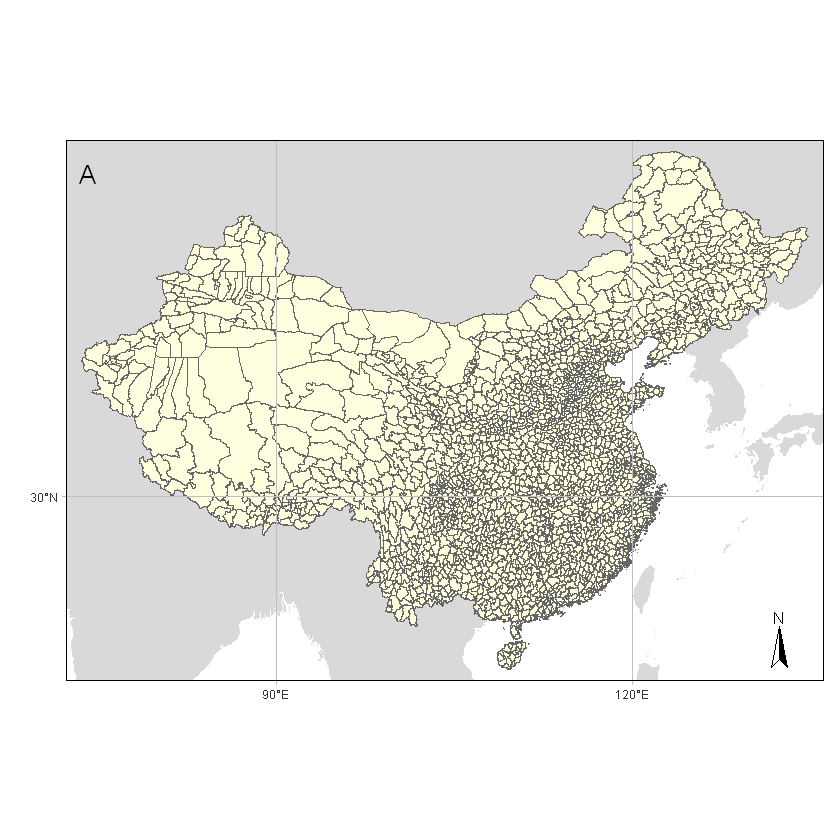

In [94]:
admin

In [102]:
random<-tm_shape(continents,bbox = as.list(extent(china)))+
tm_fill(col="grey85")+
tm_shape(outline)+
tm_borders(col="grey50")+
tm_shape(hosner2016)+tm_dots(size=0.0001)+
tm_graticules(lwd = 0.05,col="grey75",n.x=2,n.y=2,labels.size = 0.6)+
tm_compass(north = 0)


Warning message in sp::proj4string(obj):
"CRS object has comment, which is lost in output"
Warning message:
"Currect projection of shape hosner2016 unknown. Long-lat (WGS84) is assumed."
Bounding box format automatically changed from [xmin, xmax, ymin, ymax] to [xmin, ymin, xmax, ymax]



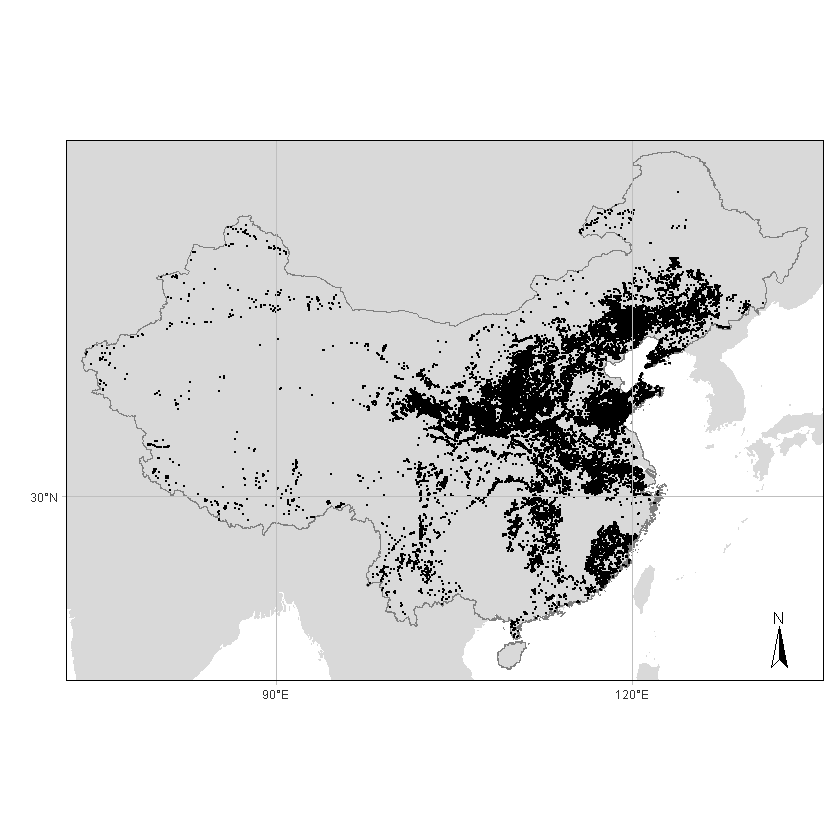

In [103]:
random

In [83]:
maps<-tmap_arrange(admin,random, ncol = 2)

In [84]:
path2outputs<-here("outputs")

In [101]:
tmap_save(tm = admin,filename = here("outputs","admin_div.png"),width = 14.3, height= 10,units = "cm",dpi = 300)

Warning message in sp::proj4string(obj):
"CRS object has comment, which is lost in output"
Warning message:
"One tm layer group has duplicated layer types, which are omitted. To draw multiple layers of the same type, use multiple layer groups (i.e. specify tm_shape prior to each of them)."
Bounding box format automatically changed from [xmin, xmax, ymin, ymax] to [xmin, ymin, xmax, ymax]

Map saved to G:\My Drive\my_repositories\PhD\outputs\admin_div.png

Resolution: 1688.976 by 1181.102 pixels

Size: 5.629921 by 3.937008 inches (300 dpi)



In [104]:
tmap_save(tm = random,filename = here("outputs","random samples.png"),width = 14.3, height= 10,units = "cm",dpi = 300)

Warning message in sp::proj4string(obj):
"CRS object has comment, which is lost in output"
Warning message:
"Currect projection of shape hosner2016 unknown. Long-lat (WGS84) is assumed."
Bounding box format automatically changed from [xmin, xmax, ymin, ymax] to [xmin, ymin, xmax, ymax]

Map saved to G:\My Drive\my_repositories\PhD\outputs\random samples.png

Resolution: 1688.976 by 1181.102 pixels

Size: 5.629921 by 3.937008 inches (300 dpi)



In [ ]:
tm_credits("Coordinate system: World Geodetic System 1984\nData source for administrative division DIVA-GIS (https://www.diva-gis.org/)",position=c("left","bottom"),)


In [105]:
ne_url <- "http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/raster/HYP_HR_SR_W_DR.zip"
ne_fname <-here("raw_data","HYP_HR_SR_W_DR")

In [ ]:
### Preparing environmental data for 6 time slices from Mid-Holocene to the present:

# Download the zipped folder
download.file(ne_url,paste(ne_fname,".zip",sep=""), mode = "wb")

In [108]:
path2raw_data<-here("raw_data")

In [109]:
# Unzip the folder and get the names of its contents:
files <- unzip(paste(ne_fname,".zip",sep=""), exdir=path2raw_data)

# Removes the zipped folder:
file.remove(paste(ne_fname,".zip",sep=""))

[1] TRUE

In [111]:
ne_fname

[1] "G:/My Drive/my_repositories/PhD/raw_data/HYP_HR_SR_W_DR"

In [112]:
### Load shaded relief data:
map<-brick(paste(ne_fname,"///",sub('.*/', '',ne_fname),".tif",sep=""))
# Clip the map to the extent of China
clipped_rbg<-crop(map, extent(china), snap="out")
# Mask the map with the extent of China
cropped_rbg<-mask(clipped_rbg, china)

In [116]:
library(prettymapr) # for north arrow


Warning message:
"package 'prettymapr' was built under R version 4.0.4"


In [165]:
path2locations<-here("data","ESM_2.csv")

In [ ]:
### Import Fagopyrum locations for China:

# Import the table for Fagopyrum occurance records, based on (Hunt et al., 2017) and further evidence from the literature
locations <- read.csv(path2locations)

# Transform data into a spatial points data.frame
coordinates(locations)<-~longitude+latitude

# Omit duplicate entry for Kyung-lung Mesa with no species identification
locations<-locations[!(locations$Site_short=="Kyung-lung Mesa"&locations$Taxonomic_identification=="Fagopyrum sp."),]

# Make separate subset for locations of Fagopyrum tataricum
loc_china<-locations[locations$Country=="China"&!(locations$Site_short%in%c("Qugong","Kyung-lung Mesa")),]
ft<-locations[locations$Country=="China"&locations$Taxonomic_identification%in%c("Fagopyrum tataricum"),]

In [180]:
library(maptools) # making maps with plotRGB

In [181]:
path2buckwheat_locations<-here("outputs","buckwheat_locations.png")

In [182]:
options(repr.plot.width=6.85,repr.plot.height=4.9,repr.plot.res=300)

### Plot the locations of Fagopyrum macro and micro-fossils over a relevent background
# Open the graphical device
png(path2buckwheat_locations,width=17.4, height=12.5,units="cm",res=300)

# Set margind
par(mar=c(0,0,0,0),oma=c(0,0,0,0),par(xpd=FALSE))
# Plot background
#plotRGB(clipped_rbg, margins=TRUE,axes=FALSE)
plotRGB(clipped_rbg, margins=FALSE,axes=FALSE)

# Add axes
axis(side=4, at=c(0,20,40,60),cex.axis=0.7,labels=c("0 °N\n","20 °N\n","40 °N\n","60 °N\n"),pos=c(73.5,120),tck=-2,las=2,cex=1.5,col="steelblue",col.axis="steelblue",xpd=FALSE)
axis(side=1, at=c(80,100,120),cex.axis=0.7,labels=c("80 °E           ","100 °E            ","120 °E            "),pos=55 ,tck=-1.5,cex=1.5,col="steelblue",lwd=1.2,col.axis="steelblue",xpd=FALSE)
# Add provinces and outline of China
#plot(provinces, add=TRUE,border="grey35", axes=FALSE)
plot(outline,add=TRUE,border="grey30",lwd=1.2,axes=FALSE)
#text(provinces,provinces$NAME_1,cex=0.6,font=4,col="brown")
# Add location of sites by sample type
points(loc_china[loc_china$Sample_type=="Pollen sequence",],pch=21,bg="mediumseagreen",col="grey35")
points(loc_china[loc_china$Sample_type=="Charred seeds",],pch=24,bg="mediumorchid4",col="grey35")
points(loc_china[loc_china$Sample_type=="Starch grains",],pch=22,bg="slateblue",col="grey35")
points(ft,pch=24,bg="red",col="grey35")
# Add legend for site names
#legend("bottom", inset=c(0,-0.70), legend=paste(paste(as.character(1:nrow(locations[locations$Country=="China",])),".",sep=""),
#                                                locations[locations$Country=="China",]$Site_short,"\n    ",
#                                                locations[locations$Country=="China",]$Dating_result,"\n",sep=" "),
#       pch="",ncol=4,cex=0.7,text.width=13.3,bg="white")


# Add point labels
#pointLabel(coordinates(locations[locations$Country=="China",]),method="SANN",labels=as.character(1:nrow(locations[locations$Country=="China",])),cex=0.8,col="black",font=2)
# Add legend for sample types
legend("bottomright",legend=c("pollen sequence", "charred seeds","starch grains","F. tataricum\ncharred seeds\n"),
       pt.bg=c("mediumseagreen", "mediumorchid4","slateblue","red"), pch=c(21,24,22,24),cex=0.6,pt.cex = 1,inset=c(0.01,0.01))
addnortharrow(pos = "topright",scale = 0.5) # Add north arrow
box()
text(83,19,"Coordinate system: World Geodetic System 1984",cex=0.55) # Add info about projection
# Close the device
dev.off()

# For jupyter plot- set in legend:

#inset=.02

png 
  2

In [136]:
library(xlsx)


Warning message:
"package 'xlsx' was built under R version 4.0.5"


In [170]:
path2locations<-here("data","guedesbocinsky2018_crops_across_eurasia_translated.xlsx")
locations<-read.xlsx(path2locations,1)

In [171]:
# Inculde only rows with data, that were not explicitly excluded
locations<-locations[!is.na(locations$Site)&is.na(locations$Exclude.),]
locations[,c("Longitude")]<-as.numeric(locations$Longitude)
locations[,c("Latitude")]<-as.numeric(locations$Latitude)

In [172]:
# Transform location data data into a spatial points data.frame
coordinates(locations)<-~Longitude+Latitude
crs(locations) <-crs(china)

In [174]:
locations<-locations[china,]

In [ ]:
locations_

In [177]:
path2archaeobot_locations<-here("outputs","archaeobot_locations.png")


In [178]:
options(repr.plot.width=6.85,repr.plot.height=4.9,repr.plot.res=300)

### Plot the locations of Fagopyrum macro and micro-fossils over a relevent background
# Open the graphical device
png(path2archaeobot_locations,width=17.4, height=12.5,units="cm",res=300)

# Set margind
par(mar=c(0,0,0,0),oma=c(0,0,0,0),par(xpd=FALSE))
# Plot background
#plotRGB(clipped_rbg, margins=TRUE,axes=FALSE)
plotRGB(clipped_rbg, margins=FALSE,axes=FALSE)

# Add axes
axis(side=4, at=c(0,20,40,60),cex.axis=0.7,labels=c("0 °N\n","20 °N\n","40 °N\n","60 °N\n"),pos=c(73.5,120),tck=-2,las=2,cex=1.5,col="steelblue",col.axis="steelblue",xpd=FALSE)
axis(side=1, at=c(80,100,120),cex.axis=0.7,labels=c("80 °E           ","100 °E            ","120 °E            "),pos=55 ,tck=-1.5,cex=1.5,col="steelblue",lwd=1.2,col.axis="steelblue",xpd=FALSE)
# Add provinces and outline of China
#plot(provinces, add=TRUE,border="grey35", axes=FALSE)
plot(outline,add=TRUE,border="grey30",lwd=1.2,axes=FALSE)
#text(provinces,provinces$NAME_1,cex=0.6,font=4,col="brown")
# Add location of sites by sample type
points(locations,pch=21,bg="grey35",col="black")

# Add legend for site names
#legend("bottom", inset=c(0,-0.70), legend=paste(paste(as.character(1:nrow(locations[locations$Country=="China",])),".",sep=""),
#                                                locations[locations$Country=="China",]$Site_short,"\n    ",
#                                                locations[locations$Country=="China",]$Dating_result,"\n",sep=" "),
#       pch="",ncol=4,cex=0.7,text.width=13.3,bg="white")


# Add point labels
#pointLabel(coordinates(locations[locations$Country=="China",]),method="SANN",labels=as.character(1:nrow(locations[locations$Country=="China",])),cex=0.8,col="black",font=2)
# Add legend for sample types
#legend("bottomright",legend=c("pollen sequence", "charred seeds","starch grains","F. tataricum\ncharred seeds\n"),
#       pt.bg=c("mediumseagreen", "mediumorchid4","slateblue","red"), pch=c(21,24,22,24),cex=0.6,pt.cex = 1,inset=c(0.01,0.01))
addnortharrow(pos = "topright",scale = 0.5) # Add north arrow
box()
text(83,19,"Coordinate system: World Geodetic System 1984",cex=0.55) # Add info about projection
# Close the device
dev.off()

# For jupyter plot- set in legend:

#inset=.02

png 
  2